In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import datetime
import pickle
import calendar
from folium.plugins import HeatMapWithTime
import seaborn as sns
import numpy as np
import gmplot

#import geopy
#import usaddress
#import reverse_geocoder as rg 
#import pprint 

In [3]:
#set .head() to show all columns and rows if run

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Formatting

Only used during first loading of data to make the raw data more user-friendly

In [4]:
#data['Call Received'] = pd.to_datetime(data['Call Received'])

In [5]:
#data.info()

In [6]:
#rename
#data = data.rename({'Event Number': 'event_num', 'Call Received': 'call_re', 'Complaint Number' : 'comp_num', 'Shift':'shift', 'Tencode':'tc', 'Tencode Description':'tc_desc', 'Tencode Suffix':'tc_suff', 'Tencode Suffix Description':'tc_suff_desc','Disposition Code':'disp_code', 'Disposition Description':'disp_desc','Block':'block','Street Name':'st_name','Unit Dispatched':'unit_disp','Sector':'sect','Zone':'zone','RPA':'rpa','Latitude':'lat','Longitude':'long','Mapped Location':'map_loc'}, axis=1)

In [7]:
#data['month'] = pd.DatetimeIndex(data['call_re']).month
#data['day'] = pd.DatetimeIndex(data['call_re']).day

In [8]:
#rename
#data = data.rename({'Event Number': 'event_num', 'Call Received': 'call_re', 'Complaint Number' : 'comp_num', 'Shift':'shift', 'Tencode':'tc', 'Tencode Description':'tc_desc', 'Tencode Suffix':'tc_suff', 'Tencode Suffix Description':'tc_suff_desc','Disposition Code':'disp_code', 'Disposition Description':'disp_desc','Block':'block','Street Name':'st_name','Unit Dispatched':'unit_disp','Sector':'sect','Zone':'zone','RPA':'rpa','Latitude':'lat','Longitude':'long','Mapped Location':'map_loc','geometry':'geo','index_right':'ind_r'}, axis=1)

In [9]:
# Create column to identify if incident location is in TN

#outers = [34.153, 0, -2.283]
#data['in_state'] = np.where(data.lat.isin(outers), False, True)

# Note: Loading raw data for 2013 - 2017 shows three popular locations recorded that are outside of TN with unique latitudes listed in the outers array.

In [10]:
#to avoid having to recreate and reload info
#data = data.to_csv('./data/df_2013_formatted_with_zip.csv', index = False)

## Load Formatted Crime Data

In [11]:
data = pd.read_csv('./data/df_2013_formatted_with_zip.csv')

In [12]:
data.shape

(1211710, 25)

In [13]:
data.head()

,index_left,zip,event_num,call_re,comp_num,shift,tc,tc_desc,tc_suff,tc_suff_desc,disp_code,disp_desc,block,st_name,unit_disp,sect,zone,rpa,lat,Longitude,map_loc,month,day,geometry,in_state
0,0.0,37115.0,PD201300025100,2013-01-07 12:15:00,20130018665,A,50,Theft,TV,NaN,1,M.P.D. REPORT COMPLED,500,STAR BLVD,723A,M,23.0,1739,36.288,-86.721,"(36.288, -86.721)",1,7,POINT (-86.721 36.288),True
1,0.0,37115.0,PD201300026515,2013-01-07 19:11:00,20130019575,B,43,Want Officer for Investigation / Assistance,RT,REPORT FOR TELESERVE,1,M.P.D. REPORT COMPLED,500,STAR BLVD,TE02,M,23.0,1739,36.288,-86.721,"(36.288, -86.721)",1,7,POINT (-86.721 36.288),True
2,0.0,37115.0,PD201300077212,2013-01-19 20:28:00,20130056888,B,50,Theft,RV,NaN,1,M.P.D. REPORT COMPLED,500,STAR BLVD,723B,M,23.0,1739,36.288,-86.720,"(36.288, -86.72)",1,19,POINT (-86.72 36.288),True
3,0.0,37115.0,PD201301092986,2013-10-19 10:06:00,20130976057,A,46,Vehicle Accident - Personal Injury,P,PROGRESS,1,M.P.D. REPORT COMPLED,500,STAR BLVD,725A,M,23.0,1739,36.288,-86.721,"(36.288, -86.721)",10,19,POINT (-86.721 36.288),True
4,0.0,37115.0,PD201300943614,2013-09-06 16:14:00,20130842034,B,43,Want Officer for Investigation / Assistance,R,REPORT,1,M.P.D. REPORT COMPLED,400,STAR BLVD,723B,M,23.0,1739,36.288,-86.719,"(36.288, -86.719)",9,6,POINT (-86.71899999999999 36.288),True


In [14]:
data.tail()

,index_left,zip,event_num,call_re,comp_num,shift,tc,tc_desc,tc_suff,tc_suff_desc,disp_code,disp_desc,block,st_name,unit_disp,sect,zone,rpa,lat,Longitude,map_loc,month,day,geometry,in_state
1211705,NaN,NaN,PD201301344233,2013-12-31 23:57:00,20131202596,NaN,43,Want Officer for Investigation / Assistance,P,PROGRESS,5,GONE ON ARRIVAL,600,ROTHWOOD AV,714C,M,11.0,0,34.153,-92.509,"(34.153, -92.509)",12,31,POINT (-92.509 34.153),False
1211706,NaN,NaN,PD201301344235,2013-12-31 23:57:00,20131202597,NaN,96,Business Check,NaN,NaN,15,COMMUNITY POLICING,4600,NOLENSVILLE PKE,332C,S,33.0,0,34.153,-92.509,"(34.153, -92.509)",12,31,POINT (-92.509 34.153),False
1211707,NaN,NaN,PD201301344236,2013-12-31 23:57:00,20140000052,NaN,44,Disorderly Person,P,PROGRESS,5,GONE ON ARRIVAL,3800,CENTRAL PKE,521C,H,21.0,9529,34.153,-92.509,"(34.153, -92.509)",12,31,POINT (-92.509 34.153),False
1211708,NaN,NaN,PD201301344237,2013-12-31 23:58:00,20140000169,NaN,53,Holdup / Robbery,R,REPORT,1,M.P.D. REPORT COMPLED,1100,AIRPORT CENTER DR,515C,H,17.0,9411,34.153,-92.509,"(34.153, -92.509)",12,31,POINT (-92.509 34.153),False
1211709,NaN,NaN,PD201301344238,2013-12-31 23:59:00,20140000006,NaN,83,Shots Fired,P,PROGRESS,5,GONE ON ARRIVAL,1700,SEIFRIED ST,6F85,N,11.0,4415,34.153,-92.509,"(34.153, -92.509)",12,31,POINT (-92.509 34.153),False


In [15]:
data['call_re'] = pd.to_datetime(data['call_re'])

## Dataframe Info

In [16]:
#data['tc_desc'].value_counts()

In [17]:
#data.info

# Worst Days & Weeks

## Incidents by Day

Text(0, 0.5, 'Number of Incidents')

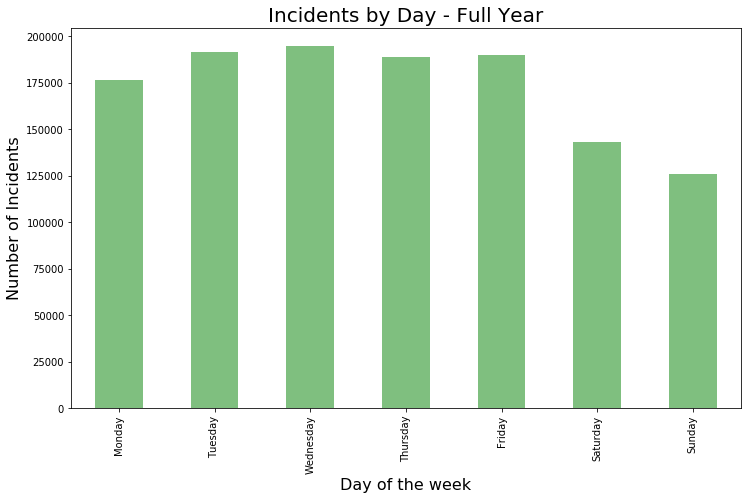

In [18]:
# Number of incidents per day of the week
day_incidents1 = data.groupby(data['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents1.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img1 = day_incidents1.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5)

# title and x,y labels
plt.title('Incidents by Day - Full Year', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

## Incidents by Day per Month

Text(0, 0.5, 'Number of Incidents')

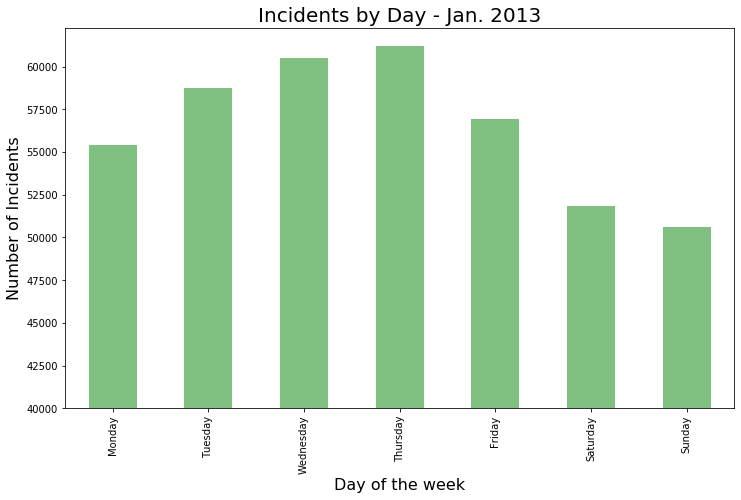

In [19]:
jan = data[data.month == 1]

# Number of incidents per day of the week
day_incidents = jan.groupby(jan['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day - Jan. 2013', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

Text(0, 0.5, 'Number of Incidents')

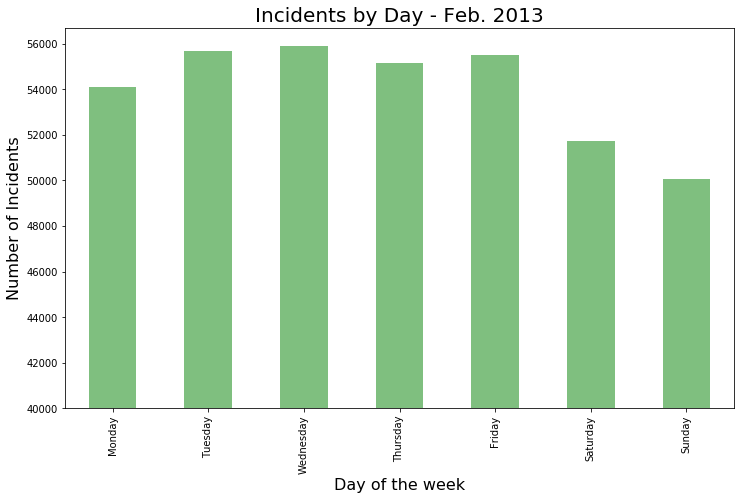

In [20]:
feb = data[data.month == 2]

# Number of incidents per day of the week
day_incidents = feb.groupby(feb['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day - Feb. 2013', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

Text(0, 0.5, 'Number of Incidents')

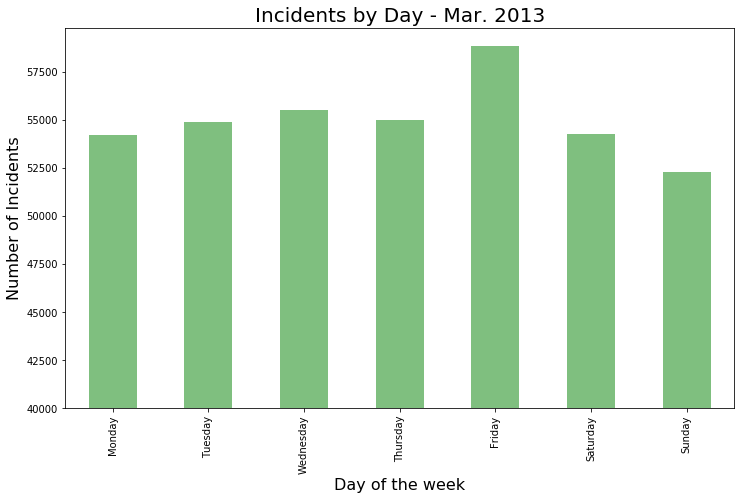

In [21]:
mar = data[data.month == 3]

# Number of incidents per day of the week
day_incidents = mar.groupby(mar['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day - Mar. 2013', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

Text(0, 0.5, 'Number of Incidents')

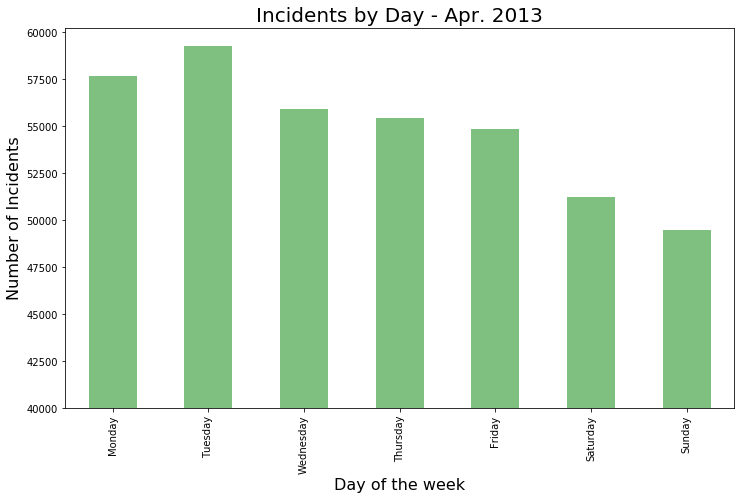

In [22]:
apr = data[data.month == 4]

# Number of incidents per day of the week
day_incidents = apr.groupby(apr['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day - Apr. 2013', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

Text(0, 0.5, 'Number of Incidents')

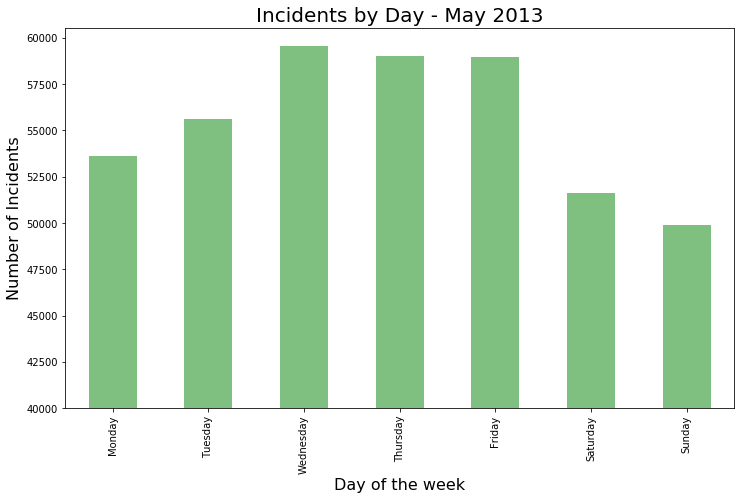

In [23]:
may = data[data.month == 5]

# Number of incidents per day of the week
day_incidents = may.groupby(may['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day - May 2013', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

Text(0, 0.5, 'Number of Incidents')

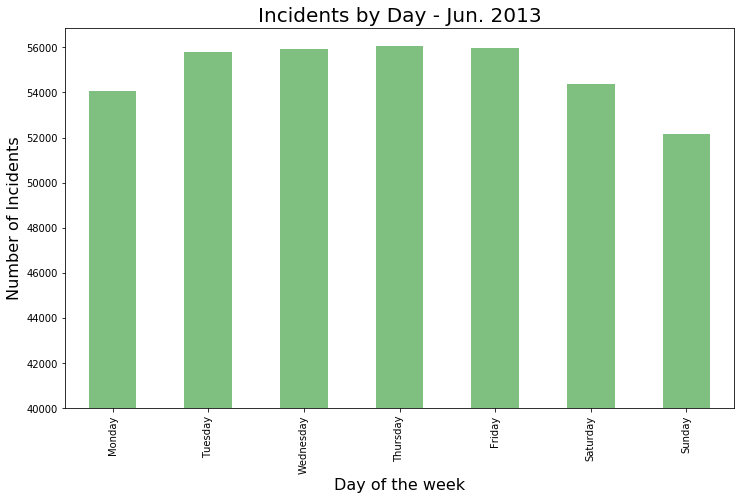

In [24]:
jun = data[data.month == 6]

# Number of incidents per day of the week
day_incidents = jun.groupby(jun['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day - Jun. 2013', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

Text(0, 0.5, 'Number of Incidents')

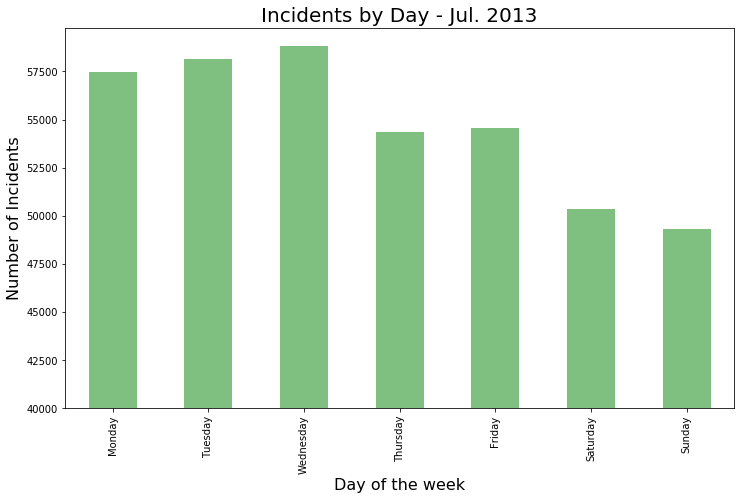

In [25]:
jul = data[data.month == 7]

# Number of incidents per day of the week
day_incidents = jul.groupby(jul['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day - Jul. 2013', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

Text(0, 0.5, 'Number of Incidents')

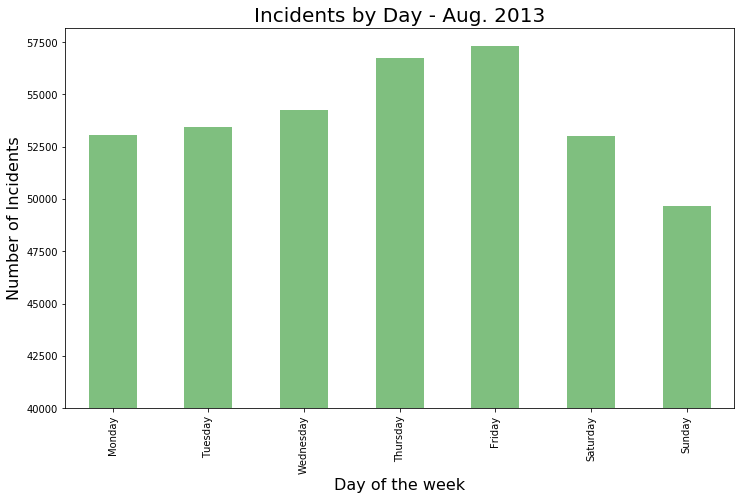

In [26]:
aug = data[data.month == 8]

# Number of incidents per day of the week
day_incidents = aug.groupby(aug['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day - Aug. 2013', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

Text(0, 0.5, 'Number of Incidents')

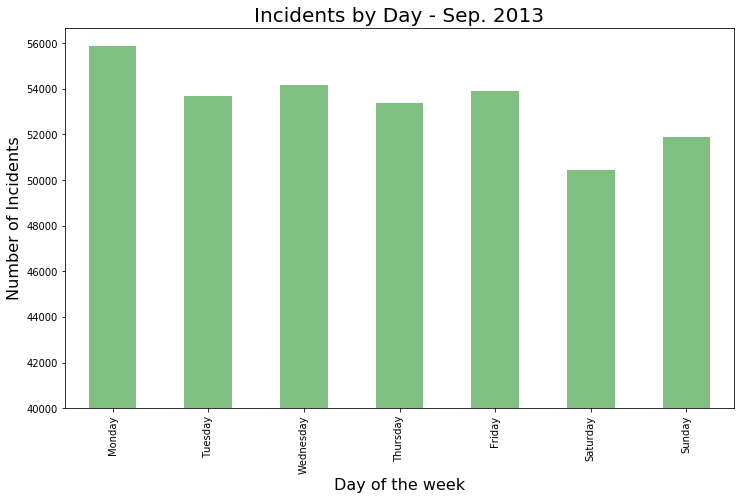

In [27]:
sep = data[data.month == 9]

# Number of incidents per day of the week
day_incidents = sep.groupby(sep['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day - Sep. 2013', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

Text(0, 0.5, 'Number of Incidents')

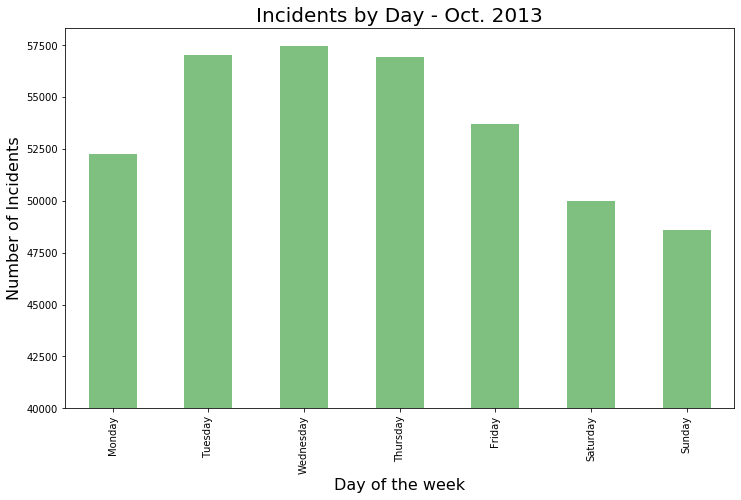

In [28]:
octo = data[data.month == 10]

# Number of incidents per day of the week
day_incidents = octo.groupby(octo['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day - Oct. 2013', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

Text(0, 0.5, 'Number of Incidents')

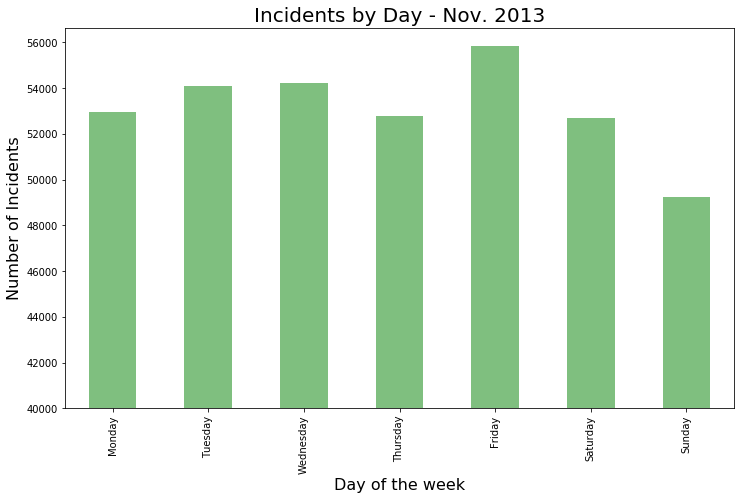

In [29]:
nov = data[data.month == 11]

# Number of incidents per day of the week
day_incidents = nov.groupby(nov['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day - Nov. 2013', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

Text(0, 0.5, 'Number of Incidents')

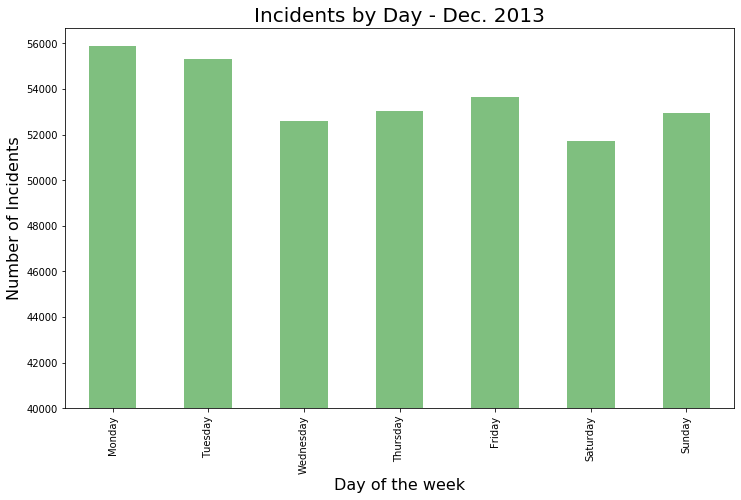

In [30]:
dec = data[data.month == 12]

# Number of incidents per day of the week
day_incidents = dec.groupby(dec['call_re'].dt.dayofweek).count().call_re

# Replace the day integers by day names.
day_incidents.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
Img2 = day_incidents.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5, bottom = 40000)

# title and x,y labels
plt.title('Incidents by Day - Dec. 2013', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

## Incidents by Quarter

In [31]:
q1 =[jan, feb, mar]
q2 = [apr, may, jun]
q3 = [jul, aug, sep]
q4 = [octo, nov, dec]

qt1 = pd.concat(q1)
qt2 = pd.concat(q2)
qt3 = pd.concat(q3)
qt4 = pd.concat(q4)

In [32]:
q1ct = qt1['comp_num'].count()
q2ct = qt2['comp_num'].count()
q3ct = qt3['comp_num'].count()
q4ct = qt4['comp_num'].count()

qtr_cts=[q1ct, q2ct, q3ct, q4ct]

qtr = ['Q1','Q2','Q3','Q4']

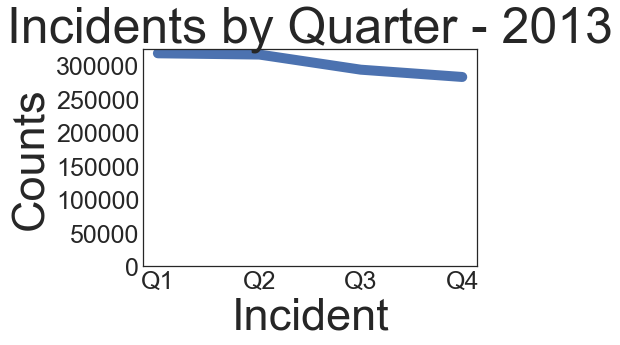

In [33]:
sns.set(rc={"lines.linewidth": 10.0})
plt.style.use('seaborn-white')

g = sns.lineplot(x = qtr ,y = qtr_cts, ci = None, alpha = 1)
plt.xticks(rotation=0, fontsize = 25)
plt.yticks(rotation=0, fontsize = 25)
plt.ylim(0,325000)
sns.set_style("white")

#sns.set(rc={'figure.figsize':(22, 22)})
plt.title("Incidents by Quarter - 2013", fontsize = 50)
plt.xlabel("Incident", fontsize = 45)
plt.ylabel("Counts", fontsize = 45)
plt.show()

## Incidents by Week

In [34]:
# Number of incidents per week
wk_incidents = data.groupby(data['call_re'].dt.week).count().call_re

print(wk_incidents)

call_re
1     26891
2     26611
3     26389
4     25215
5     25528
6     24931
7     25028
8     23557
9     24271
10    25022
11    23752
12    23372
13    23500
14    23885
15    24169
16    23854
17    24449
18    24730
19    24380
20    24579
21    24618
22    22624
23    24276
24    25093
25    24453
26    25378
27    23138
28    23425
29    23097
30    22911
31    22321
32    22500
33    21657
34    22027
35    21709
36    21083
37    22124
38    21958
39    22583
40    21541
41    21412
42    21296
43    22065
44    20530
45    21382
46    21156
47    23880
48    20539
49    23456
50    23717
51    22501
52    17147
Name: call_re, dtype: int64


In [35]:
wk_ct = pd.DataFrame(list(wk_incidents.items()))

In [36]:
s = pd.Series([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,
35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52])

wk_ct.columns = ['Week', 'Count']
wk_ct.set_index([s])

,Week,Count
1,1,26891
2,2,26611
3,3,26389
4,4,25215
5,5,25528
6,6,24931
7,7,25028
8,8,23557
9,9,24271
10,10,25022


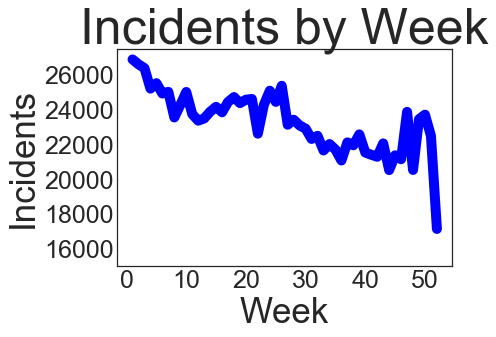

In [37]:
plt.ylim(15000, 27500)

sns.set(rc={"lines.linewidth": 10.0})

g = sns.lineplot(x = "Week",y = "Count", data = wk_ct, ci = None, color = 'blue', alpha = 1)
plt.xticks(rotation=0, fontsize = 25)
plt.yticks(rotation=0, fontsize = 25)

sns.set_style("white")
plt.style.use('seaborn-white')
plt.title("Incidents by Week", fontsize = 50)
plt.xlabel("Week", fontsize = 35)
plt.ylabel("Incidents", fontsize = 35)
plt.show()

Text(0, 0.5, 'Number of Incidents')

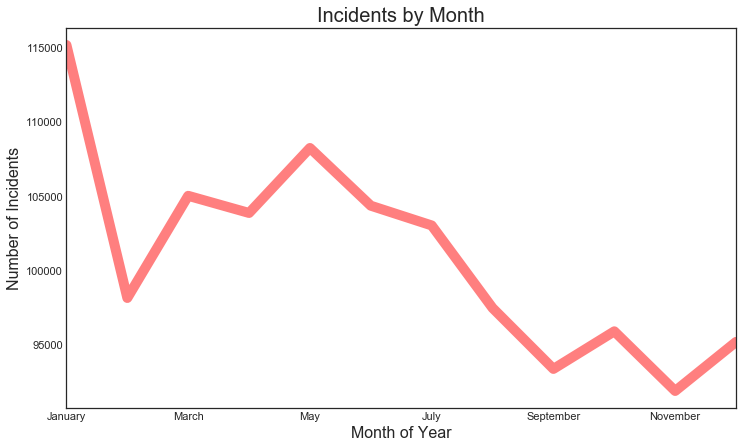

In [38]:
# Number of incidents per Month
mth_incidents = data.groupby(data['call_re'].dt.month).count().call_re

# Replace the month integers by Month names.
mth_incidents.index=[calendar.month_name[x] for x in range(1,13)]

# plot incidents per month
Img2 = mth_incidents.plot(figsize=(12,7), color='red', alpha=0.5)

# title and x,y labels
plt.style.use('seaborn-white')
plt.title('Incidents by Month', fontsize=20)
plt.xlabel('Month of Year',fontsize=16)
plt.ylabel('Number of Incidents',fontsize=16)

## Incidents Reported

In [39]:
inc_ct = data.tc_desc.value_counts()

In [40]:

inc_cts = pd.DataFrame(list(inc_ct.items()))
inc_cts.columns = ['Incident', 'Count']

In [41]:
# Largest x number of incidents

t25 = inc_cts.nlargest(10,['Count'])

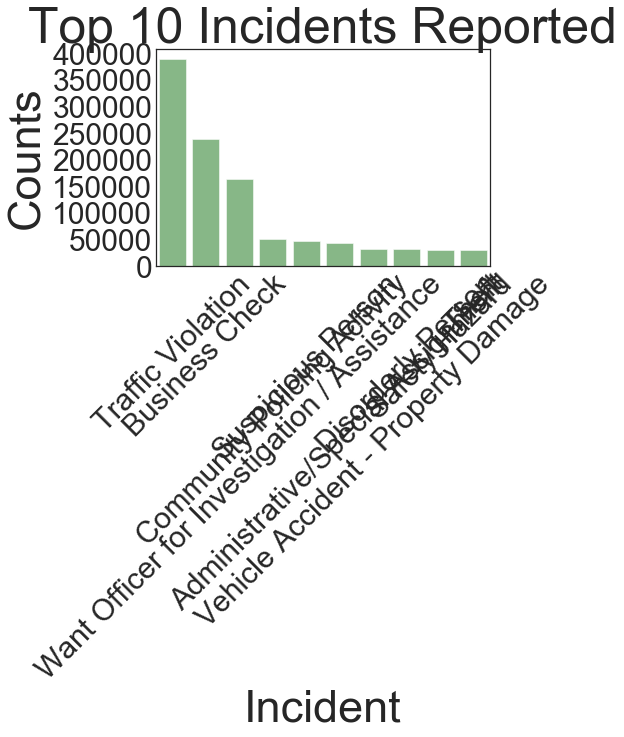

In [42]:
sns.set_style("white")
plt.style.use('seaborn-white')

g = sns.barplot(x = "Incident",y = "Count", data = t25, ci = None, color = 'green', alpha = 0.5)
plt.xticks(rotation=45, fontsize = 30)
plt.yticks(rotation=0, fontsize = 30)
sns.set(rc={'figure.figsize':(90, 70)})
plt.title("Top 10 Incidents Reported", fontsize = 50)
plt.xlabel("Incident", fontsize = 45)
plt.ylabel("Counts", fontsize = 45)
plt.show()

In [43]:
# Smallest x number of incidents

S25 = inc_cts.nsmallest(10,['Count'])

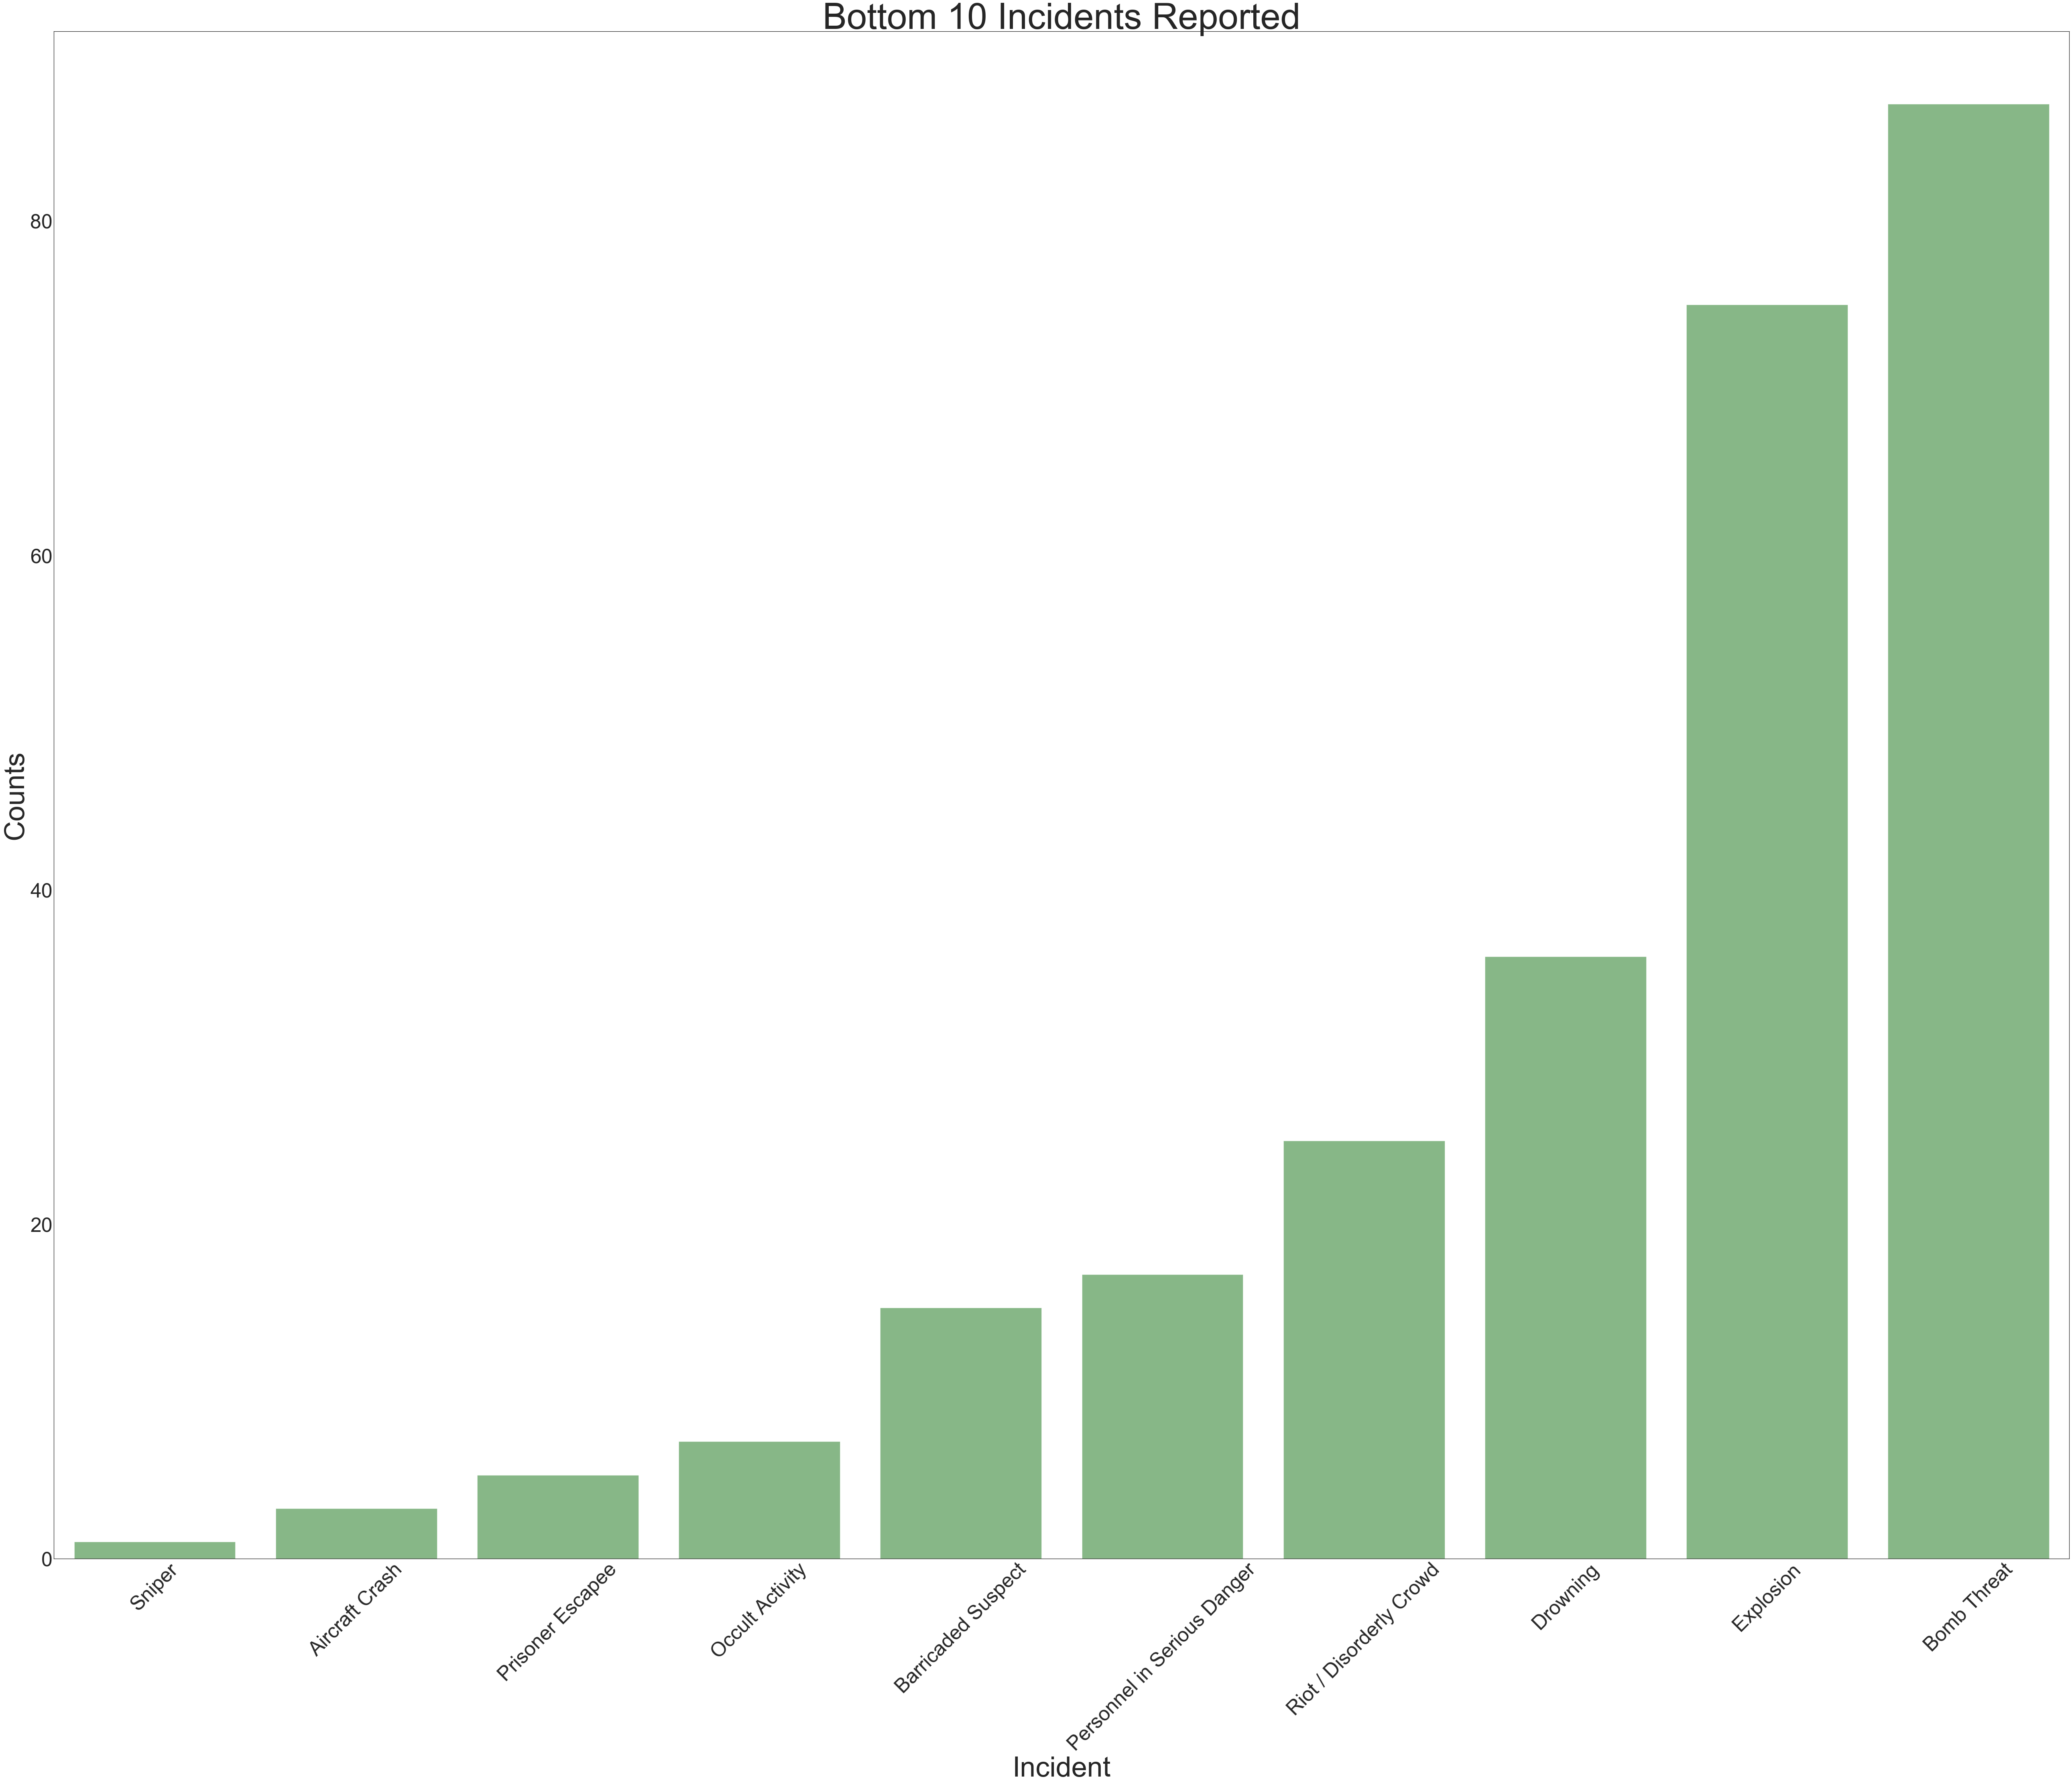

In [44]:
sns.set_style("white")
plt.style.use('seaborn-white')

g = sns.barplot(x = "Incident",y = "Count", data = S25, ci = None, color = 'green', alpha = 0.5)
plt.xticks(rotation=45, fontsize = 50)
plt.yticks(rotation=0, fontsize = 50)
sns.set(rc={'figure.figsize':(105, 75)})
plt.title("Bottom 10 Incidents Reported", fontsize = 90)
plt.xlabel("Incident", fontsize = 70)
plt.ylabel("Counts", fontsize = 70)
plt.show()

## Incidents by Zip Code

In [45]:
zip_ct = data.zip.value_counts()

In [46]:
zip_ct.shape

(38,)

In [47]:
zip_cts = pd.DataFrame(list(zip_ct.items()))
zip_cts.columns = ['zip', 'count']

In [48]:
zip_cts.head()

,zip,count
0,37211.0,37587
1,37207.0,37256
2,37203.0,36014
3,37115.0,27964
4,37209.0,25889


In [49]:
# Avg Number of Incidents 

avg_per_zip = zip_cts['count'].mean()
print(avg_per_zip)

10613.184210526315


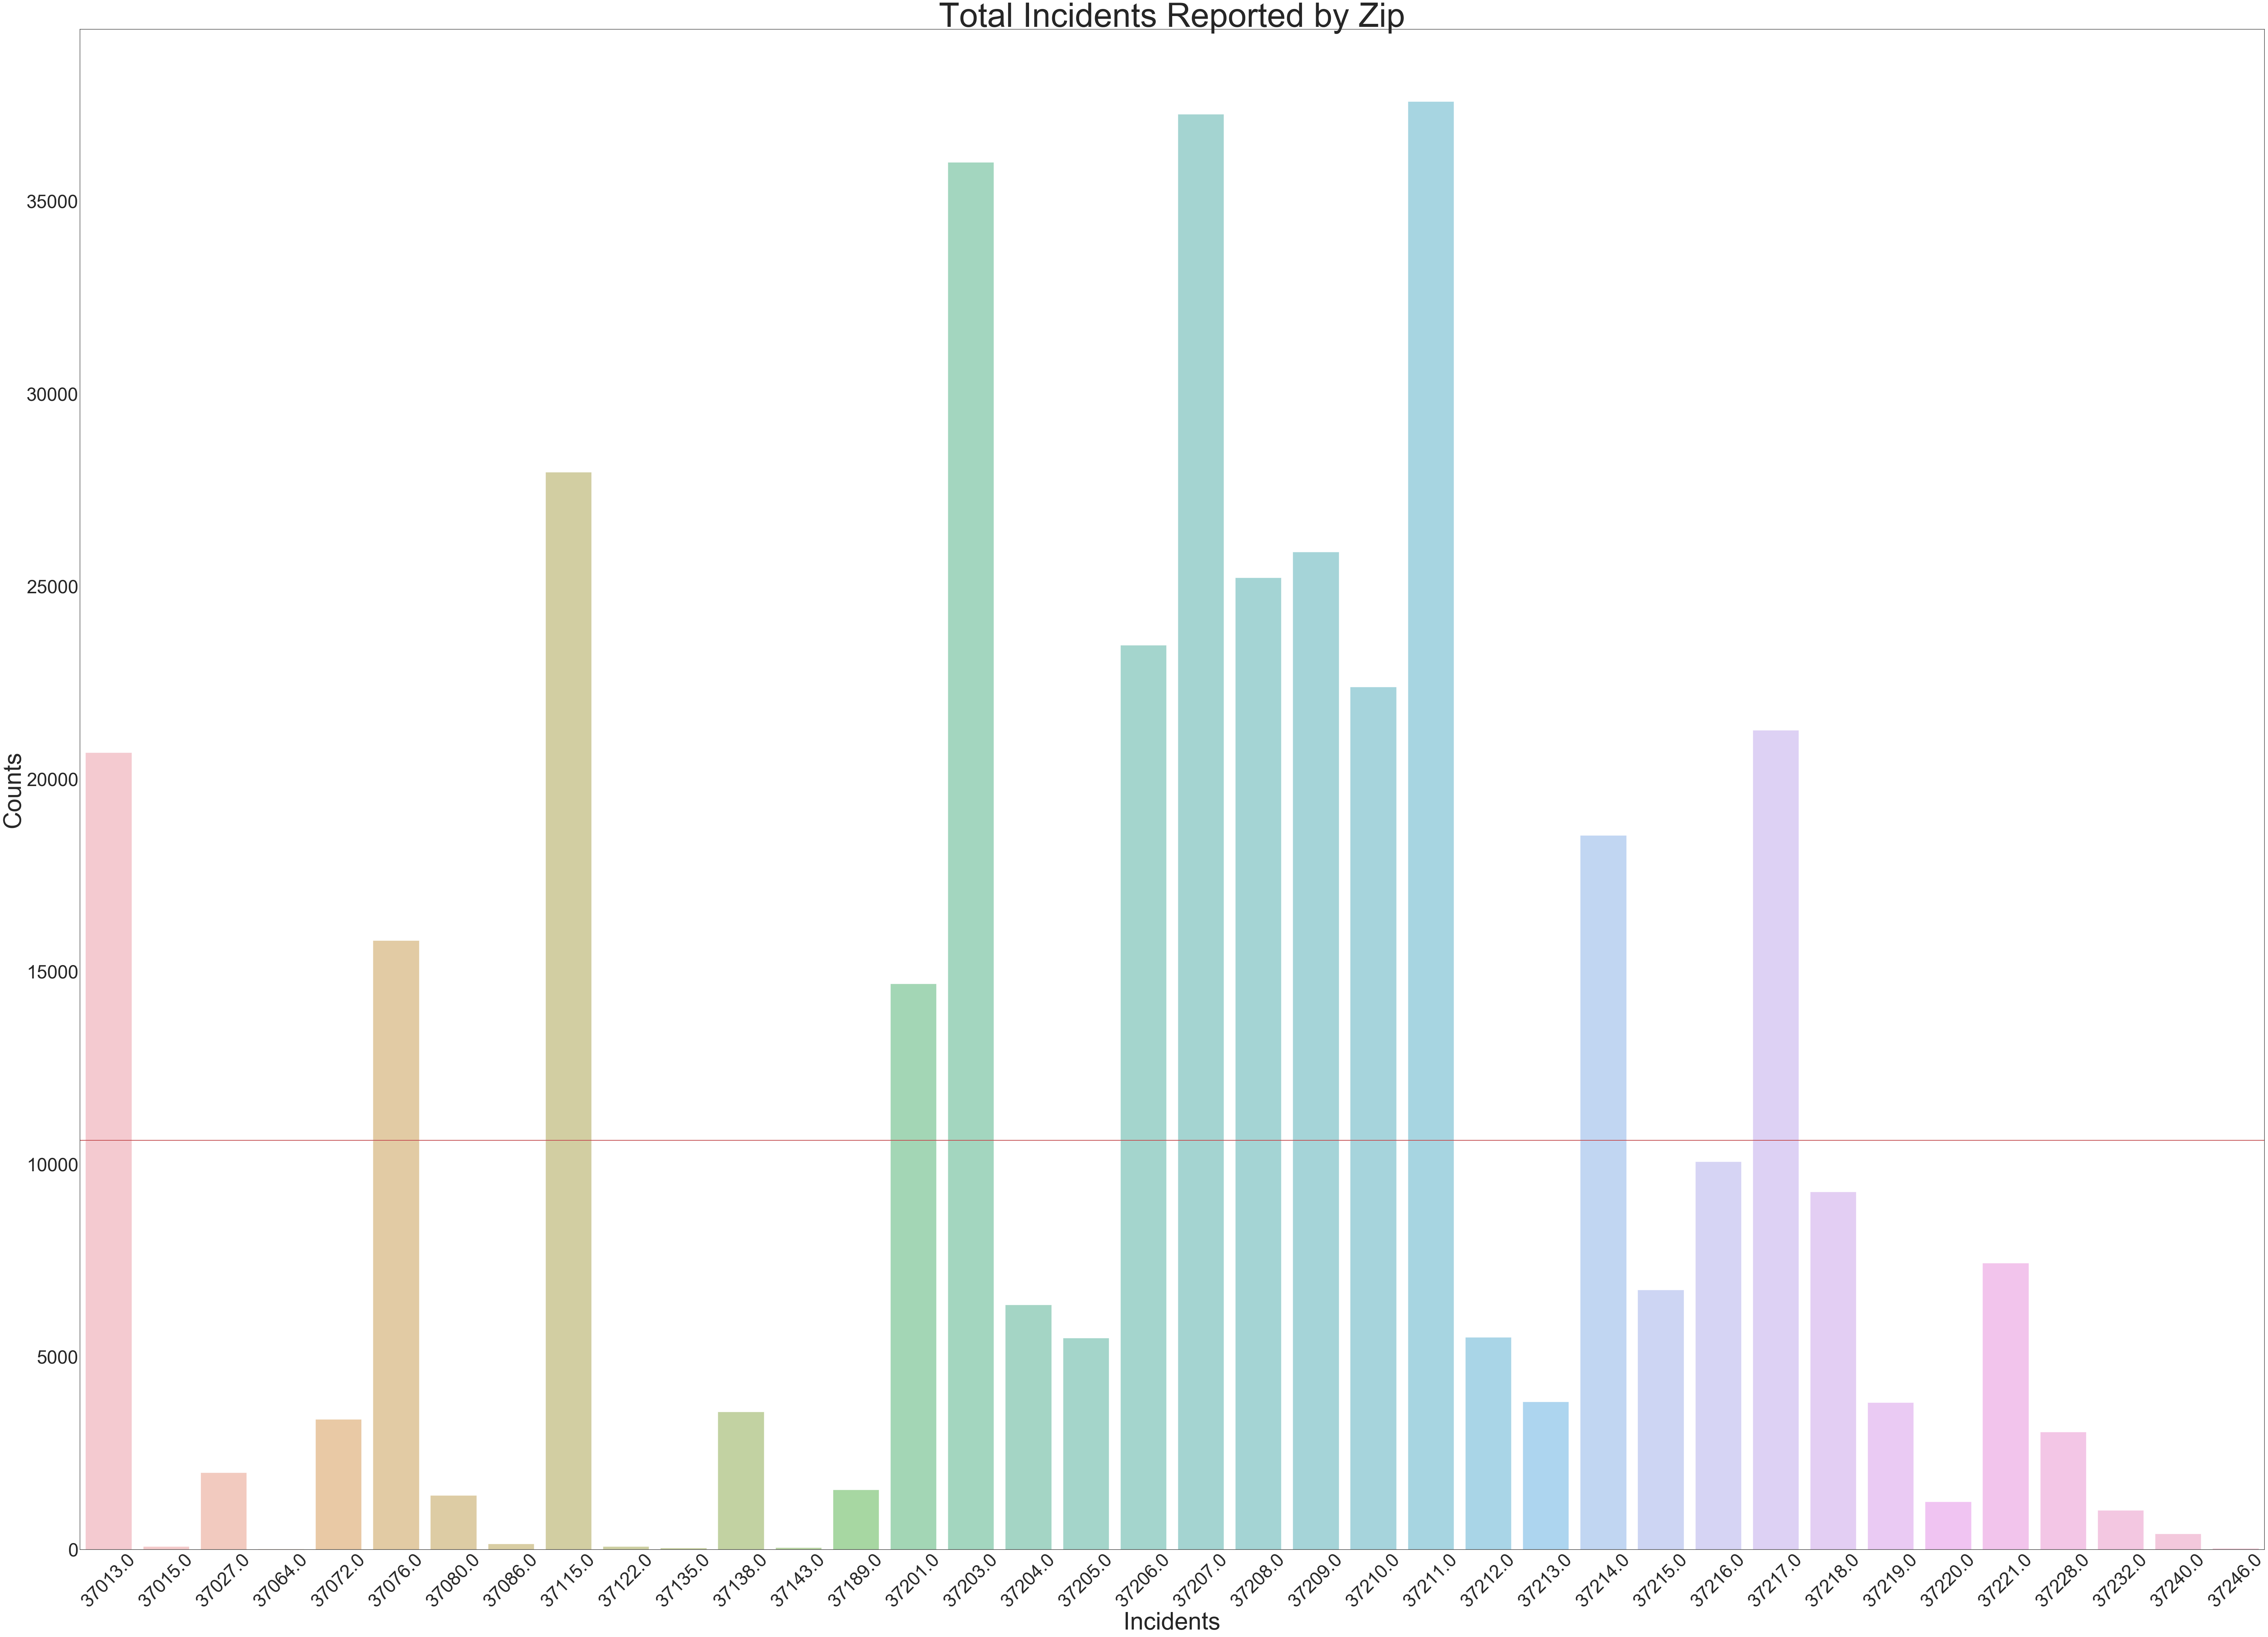

In [50]:
sns.set_style("white")
plt.style.use('seaborn-white')


g = sns.barplot(x = "zip",y = "count", data = zip_cts, ci = None, alpha = 0.5)
line1 = plt.axhline(linewidth=2, color='r', y = avg_per_zip, label = "avg.")
plt.xticks(rotation=45, fontsize = 50)
plt.yticks(rotation=0, fontsize = 50)
sns.set(rc={'figure.figsize':(90, 70)})
plt.title("Total Incidents Reported by Zip", fontsize = 90)
plt.xlabel("Incidents", fontsize = 65)
plt.ylabel("Counts", fontsize = 65)
plt.show()

### Import Zip Code Populations

In [51]:
pop_zips = pd.read_csv('./data/tn_zip_population.csv')

In [52]:
pop_zips.head()

,Unnamed: 0,zip_code,y-2016,y-2015,y-2014,y-2013,y-2012,y-2011,y-2010,aggregate
0,11901,37010,5198,5648,5568,5633,5751,5035,4679,37512
1,11902,37012,2424,2637,2766,2477,2436,2355,2292,17387
2,11903,37013,93372,90073,86261,81944,79903,76983,78406,586942
3,11904,37014,2663,2500,2410,2130,1746,1812,1855,15116
4,11905,37015,17996,18361,17846,17400,16985,16976,17184,122748


#### Merge zip_cts to pop_zips

In [53]:
zips_all = zip_cts.merge(pop_zips, how = 'left', left_on = 'zip', right_on = 'zip_code')

In [54]:
# only focus on this year's info

zips_all = zips_all.drop(columns = ['Unnamed: 0','y-2016','y-2015','y-2014','y-2012','y-2011','y-2010','aggregate','zip_code'])

In [55]:
# rename remaining columns for convenience

zips_all = zips_all.rename(index={'zip': 'zip_code', 'count': 'inc_cts', 'y-2013': 'population'})

In [56]:
zips_all.head()

,zip,count,y-2013
0,37211.0,37587,77379.0
1,37207.0,37256,34306.0
2,37203.0,36014,11525.0
3,37115.0,27964,36959.0
4,37209.0,25889,36000.0


#### Calculate crime rate by zipcode

In [60]:
zips_all['incident_rate'] = ((zips_all['count']/zips_all['y-2013'])*100000)

In [61]:
zips_all.head()

,zip,count,y-2013,incident rate,incident_rate
0,37211.0,37587,77379.0,48575.194820,48575.194820
1,37207.0,37256,34306.0,108599.078878,108599.078878
2,37203.0,36014,11525.0,312485.900217,312485.900217
3,37115.0,27964,36959.0,75662.220298,75662.220298
4,37209.0,25889,36000.0,71913.888889,71913.888889


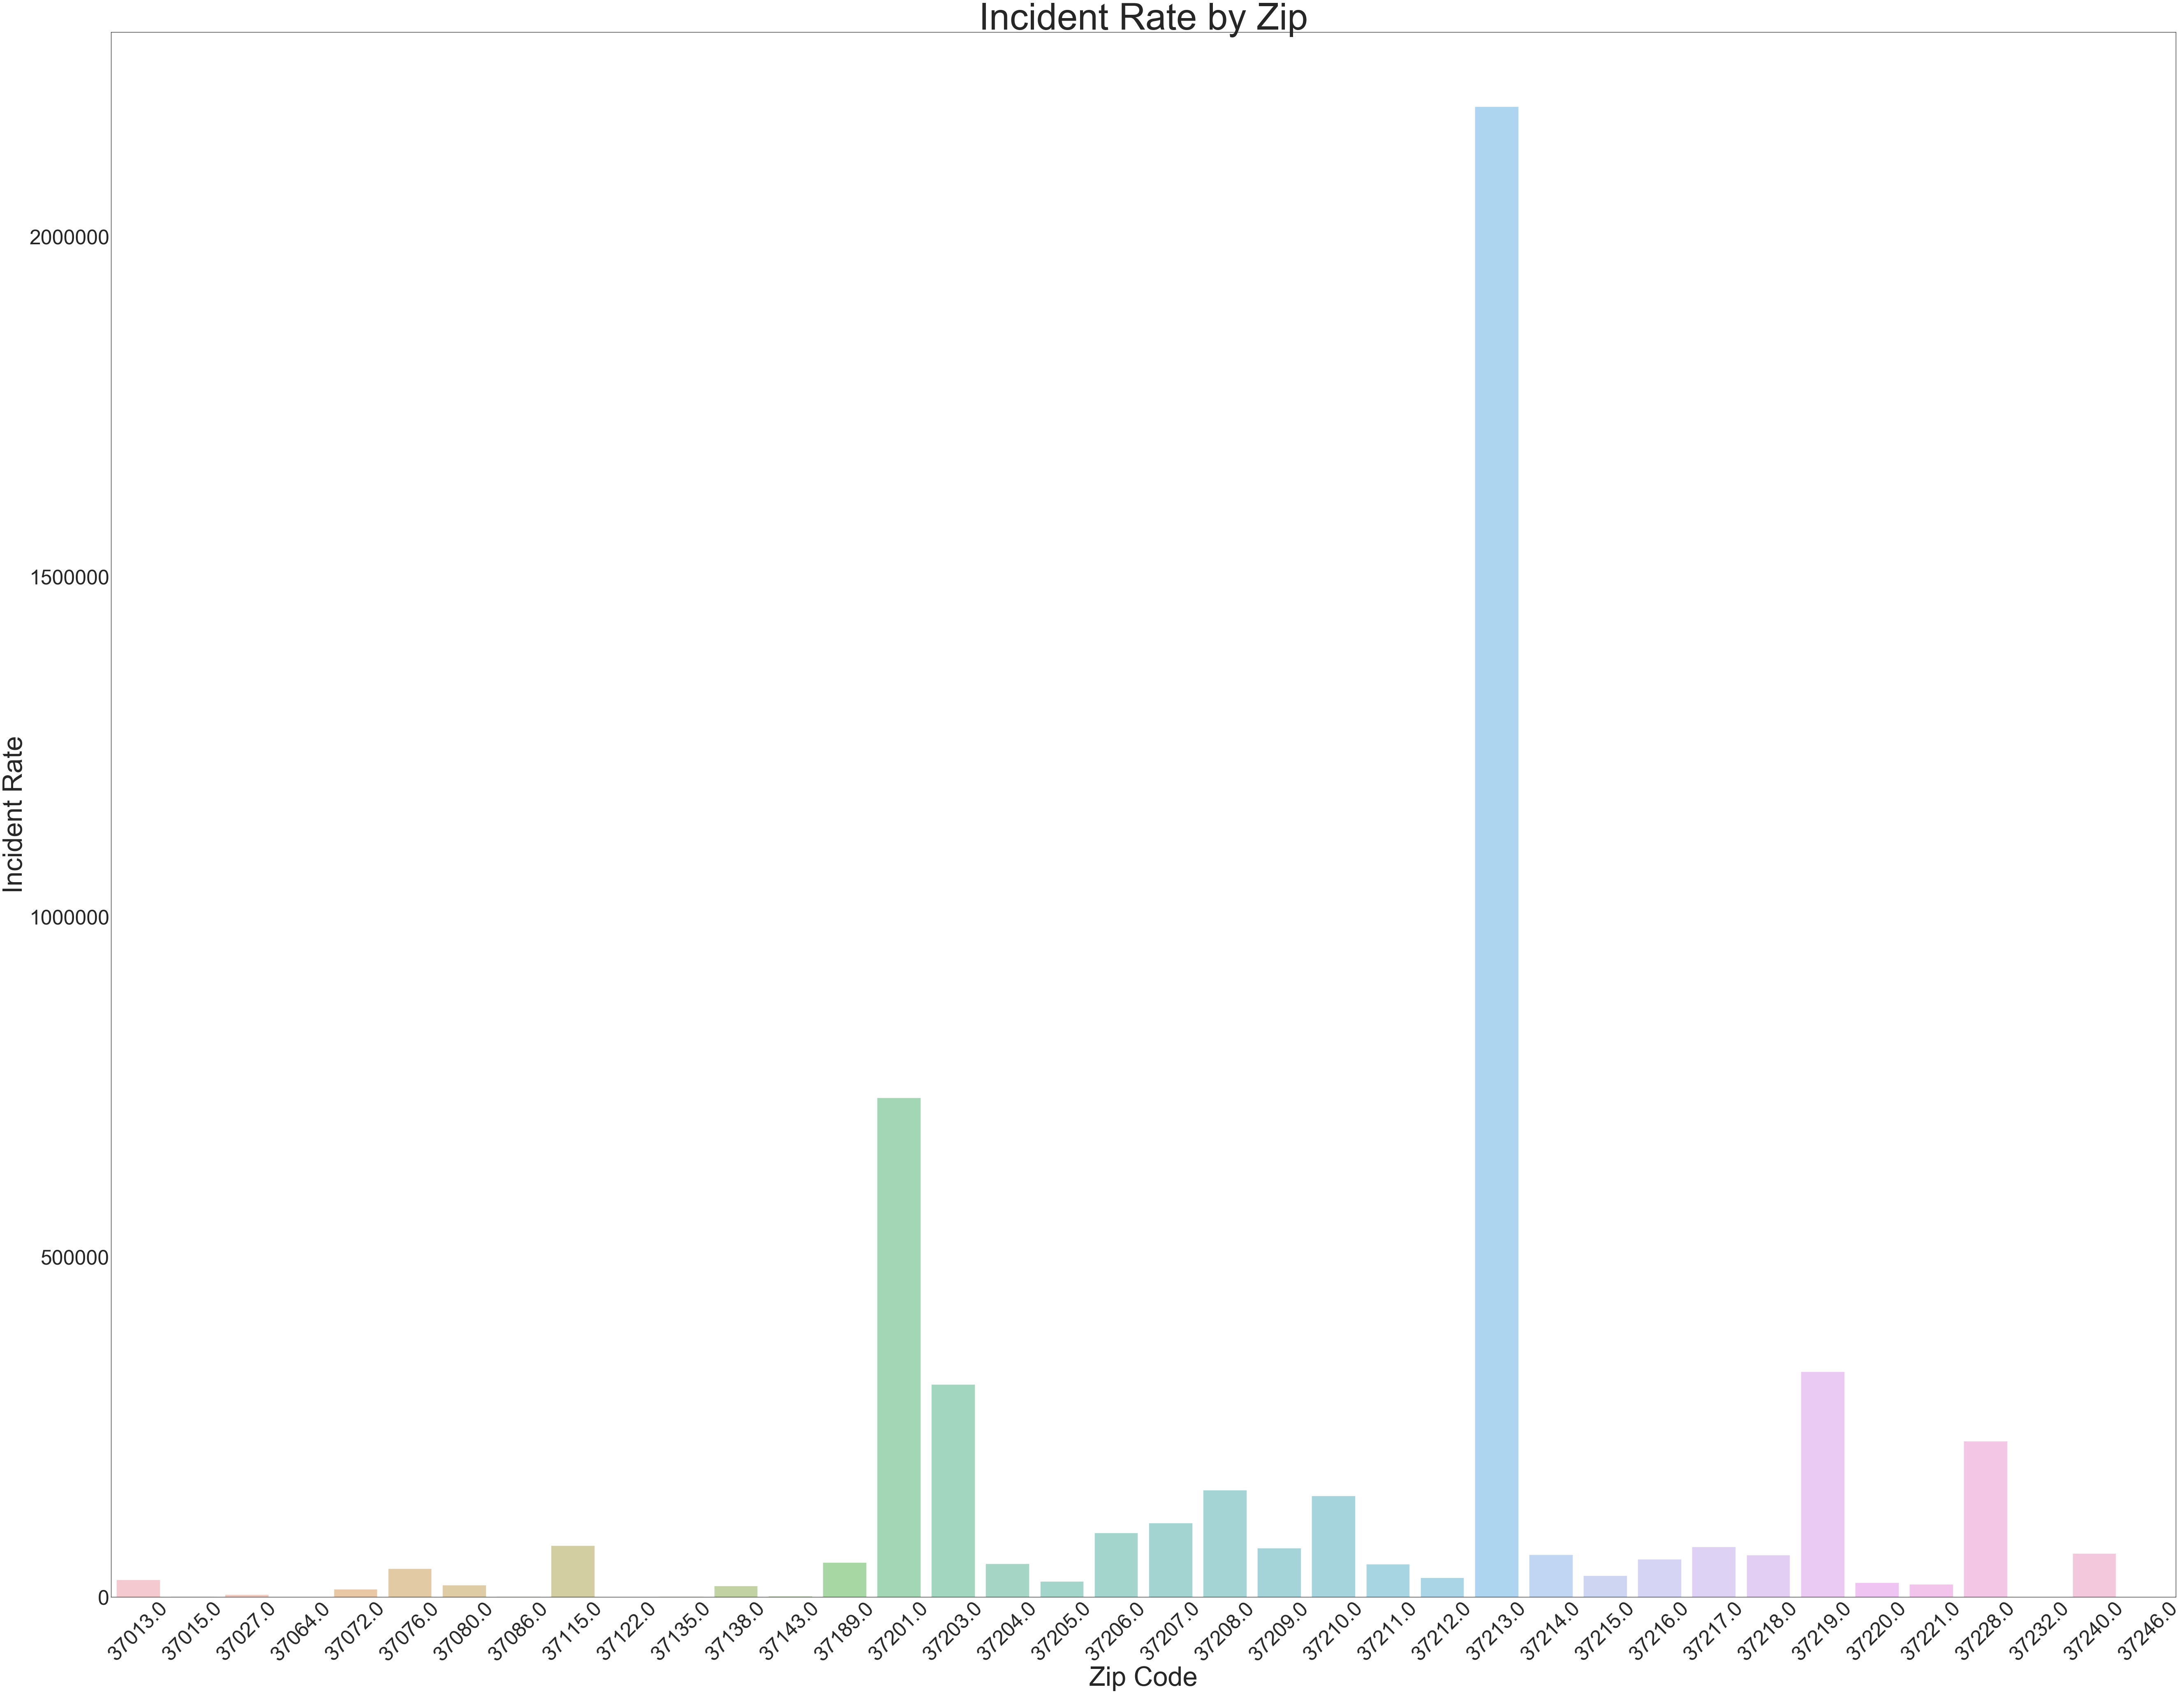

In [62]:
sns.set_style("white")
plt.style.use('seaborn-white')


g = sns.barplot(x = "zip",y = "incident_rate", data = zips_all, ci = None, alpha = 0.5)
plt.xticks(rotation=45, fontsize = 50)
plt.yticks(rotation=0, fontsize = 50)
sns.set(rc={'figure.figsize':(90, 70)})
plt.title("Incident Rate by Zip", fontsize = 90)
plt.xlabel("Zip Code", fontsize = 65)
plt.ylabel("Incident Rate", fontsize = 65)
plt.show()